In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
#Load the employees HR data 
df = pd.read_csv("HR-Employee-Attrition.csv")

In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
#######EDA##################

In [5]:
print(df.shape)
df.head(10)

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [6]:
df_attrition = df[df['Attrition'] == 'Y']


Value Counts with Percentages:
Department
Research & Development    65.374150
Sales                     30.340136
Human Resources            4.285714
Name: proportion, dtype: float64


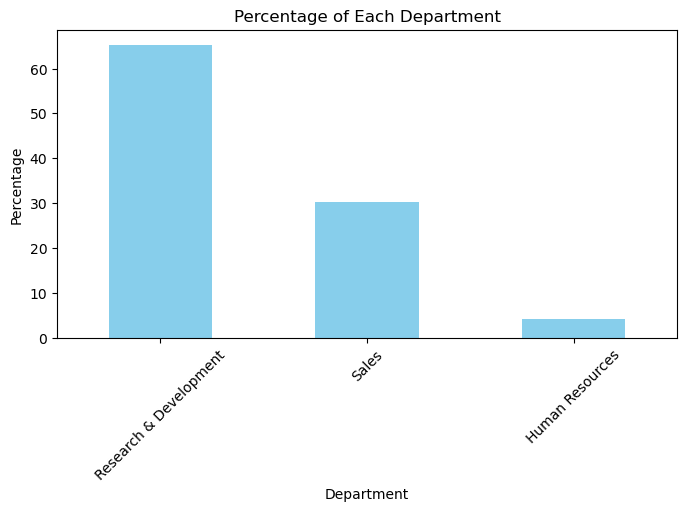

In [7]:
value_counts = df['Department'].value_counts(normalize=True) * 100

print("\nValue Counts with Percentages:")
print(value_counts)
plt.figure(figsize=(8, 4))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Percentage of Each Department')
plt.xlabel('Department')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()


Value Counts with Percentages:
EducationField
Life Sciences       41.224490
Medical             31.564626
Marketing           10.816327
Technical Degree     8.979592
Other                5.578231
Human Resources      1.836735
Name: proportion, dtype: float64


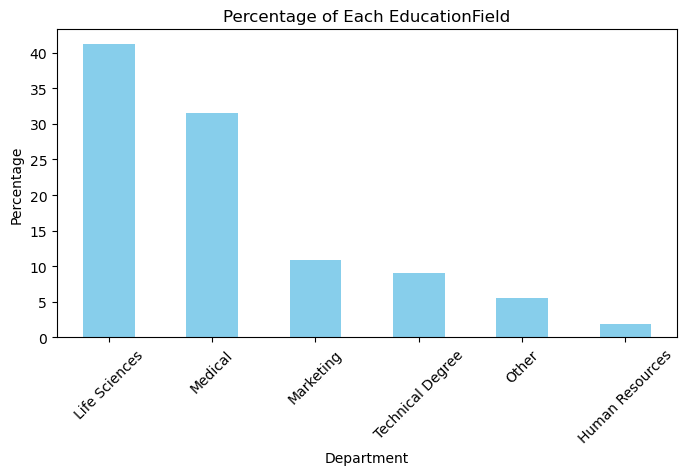

In [8]:

value_counts = df['EducationField'].value_counts(normalize=True) * 100

print("\nValue Counts with Percentages:")
print(value_counts)
plt.figure(figsize=(8, 4))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Percentage of Each EducationField')
plt.xlabel('Department')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

In [9]:
#Remove EmployeeCount, EmployeeNumber & over18 columns
df = df.drop(['EmployeeCount', 'EmployeeNumber','Over18'], axis=1)

In [10]:
#####Data Transformation####################
# Initialize LabelEncoder
label_encoder = LabelEncoder()

category_attrition = df["Attrition"].copy()
category_bt = df["BusinessTravel"].copy()
category_dept = df["Department"].copy()
category_ef = df["EducationField"].copy()
category_g = df["Gender"].copy()
category_jr = df["JobRole"].copy()
category_ms = df["MaritalStatus"].copy()
category_ot = df["OverTime"].copy()
# Fit and transform the categories to integer codes
df["Attrition"] = label_encoder.fit_transform(df["Attrition"])
df["BusinessTravel"] = label_encoder.fit_transform(df["BusinessTravel"])
df["Department"] = label_encoder.fit_transform(df["Department"])
df["EducationField"] = label_encoder.fit_transform(df["EducationField"])
df["Gender"] = label_encoder.fit_transform(df["Gender"])
df["JobRole"] = label_encoder.fit_transform(df["JobRole"])
df["MaritalStatus"] = label_encoder.fit_transform(df["MaritalStatus"])
df["OverTime"] = label_encoder.fit_transform(df["OverTime"])


In [11]:
categories = category_attrition
#print(category)
i = 0

for category, encoded_value in zip(categories, df["Attrition"]):
    if i <5:
        print(f"Category: {category}, Encoded Value: {encoded_value}")
    i= i+1

Category: Yes, Encoded Value: 1
Category: No, Encoded Value: 0
Category: Yes, Encoded Value: 1
Category: No, Encoded Value: 0
Category: No, Encoded Value: 0


In [12]:
categories = category_bt
print(set(categories))
i = 0

for category, encoded_value in zip(categories, df["BusinessTravel"]):
    if i <20:
        print(f"Category: {category}, Encoded Value: {encoded_value}")
    i= i+1

{'Travel_Rarely', 'Travel_Frequently', 'Non-Travel'}
Category: Travel_Rarely, Encoded Value: 2
Category: Travel_Frequently, Encoded Value: 1
Category: Travel_Rarely, Encoded Value: 2
Category: Travel_Frequently, Encoded Value: 1
Category: Travel_Rarely, Encoded Value: 2
Category: Travel_Frequently, Encoded Value: 1
Category: Travel_Rarely, Encoded Value: 2
Category: Travel_Rarely, Encoded Value: 2
Category: Travel_Frequently, Encoded Value: 1
Category: Travel_Rarely, Encoded Value: 2
Category: Travel_Rarely, Encoded Value: 2
Category: Travel_Rarely, Encoded Value: 2
Category: Travel_Rarely, Encoded Value: 2
Category: Travel_Rarely, Encoded Value: 2
Category: Travel_Rarely, Encoded Value: 2
Category: Travel_Rarely, Encoded Value: 2
Category: Travel_Rarely, Encoded Value: 2
Category: Non-Travel, Encoded Value: 0
Category: Travel_Rarely, Encoded Value: 2
Category: Travel_Rarely, Encoded Value: 2


In [13]:
categories = category_dept
print(set(categories))
i = 0

for category, encoded_value in zip(categories, df["Department"]):
    if i <100:
        print(f"Category: {category}, Encoded Value: {encoded_value}")
    i= i+1

{'Sales', 'Research & Development', 'Human Resources'}
Category: Sales, Encoded Value: 2
Category: Research & Development, Encoded Value: 1
Category: Research & Development, Encoded Value: 1
Category: Research & Development, Encoded Value: 1
Category: Research & Development, Encoded Value: 1
Category: Research & Development, Encoded Value: 1
Category: Research & Development, Encoded Value: 1
Category: Research & Development, Encoded Value: 1
Category: Research & Development, Encoded Value: 1
Category: Research & Development, Encoded Value: 1
Category: Research & Development, Encoded Value: 1
Category: Research & Development, Encoded Value: 1
Category: Research & Development, Encoded Value: 1
Category: Research & Development, Encoded Value: 1
Category: Research & Development, Encoded Value: 1
Category: Research & Development, Encoded Value: 1
Category: Research & Development, Encoded Value: 1
Category: Research & Development, Encoded Value: 1
Category: Sales, Encoded Value: 2
Category: 

In [14]:
categories = category_ef
print(set(categories))
i = 0

for category, encoded_value in zip(categories, df["EducationField"]):
    if i <100:
        print(f"Category: {category}, Encoded Value: {encoded_value}")
    i= i+1

{'Technical Degree', 'Life Sciences', 'Marketing', 'Other', 'Human Resources', 'Medical'}
Category: Life Sciences, Encoded Value: 1
Category: Life Sciences, Encoded Value: 1
Category: Other, Encoded Value: 4
Category: Life Sciences, Encoded Value: 1
Category: Medical, Encoded Value: 3
Category: Life Sciences, Encoded Value: 1
Category: Medical, Encoded Value: 3
Category: Life Sciences, Encoded Value: 1
Category: Life Sciences, Encoded Value: 1
Category: Medical, Encoded Value: 3
Category: Medical, Encoded Value: 3
Category: Life Sciences, Encoded Value: 1
Category: Life Sciences, Encoded Value: 1
Category: Medical, Encoded Value: 3
Category: Life Sciences, Encoded Value: 1
Category: Life Sciences, Encoded Value: 1
Category: Life Sciences, Encoded Value: 1
Category: Medical, Encoded Value: 3
Category: Life Sciences, Encoded Value: 1
Category: Life Sciences, Encoded Value: 1
Category: Other, Encoded Value: 4
Category: Life Sciences, Encoded Value: 1
Category: Life Sciences, Encoded Value

In [15]:
categories = category_g
print(set(categories))
i = 0

for category, encoded_value in zip(categories, df["Gender"]):
    if i <10:
        print(f"Category: {category}, Encoded Value: {encoded_value}")
    i= i+1

{'Male', 'Female'}
Category: Female, Encoded Value: 0
Category: Male, Encoded Value: 1
Category: Male, Encoded Value: 1
Category: Female, Encoded Value: 0
Category: Male, Encoded Value: 1
Category: Male, Encoded Value: 1
Category: Female, Encoded Value: 0
Category: Male, Encoded Value: 1
Category: Male, Encoded Value: 1
Category: Male, Encoded Value: 1


In [16]:
categories = category_jr
print(set(categories))
i = 0

for category, encoded_value in zip(categories, df["JobRole"]):  
    if i <100:
        print(f"Category: {category}, Encoded Value: {encoded_value}")
    i= i+1

{'Manufacturing Director', 'Research Director', 'Human Resources', 'Sales Representative', 'Laboratory Technician', 'Healthcare Representative', 'Sales Executive', 'Manager', 'Research Scientist'}
Category: Sales Executive, Encoded Value: 7
Category: Research Scientist, Encoded Value: 6
Category: Laboratory Technician, Encoded Value: 2
Category: Research Scientist, Encoded Value: 6
Category: Laboratory Technician, Encoded Value: 2
Category: Laboratory Technician, Encoded Value: 2
Category: Laboratory Technician, Encoded Value: 2
Category: Laboratory Technician, Encoded Value: 2
Category: Manufacturing Director, Encoded Value: 4
Category: Healthcare Representative, Encoded Value: 0
Category: Laboratory Technician, Encoded Value: 2
Category: Laboratory Technician, Encoded Value: 2
Category: Research Scientist, Encoded Value: 6
Category: Laboratory Technician, Encoded Value: 2
Category: Laboratory Technician, Encoded Value: 2
Category: Manufacturing Director, Encoded Value: 4
Category: Re

In [17]:
categories = category_ms
print(set(categories))
i = 0

for category, encoded_value in zip(categories, df["MaritalStatus"]):  
    if i <5:
        print(f"Category: {category}, Encoded Value: {encoded_value}")
    i= i+1

{'Single', 'Divorced', 'Married'}
Category: Single, Encoded Value: 2
Category: Married, Encoded Value: 1
Category: Single, Encoded Value: 2
Category: Married, Encoded Value: 1
Category: Married, Encoded Value: 1


In [18]:
categories = category_ot
print(set(categories))
i = 0

for category, encoded_value in zip(categories, df["OverTime"]):  
    if i <5:
        print(f"Category: {category}, Encoded Value: {encoded_value}")
    i= i+1

{'No', 'Yes'}
Category: Yes, Encoded Value: 1
Category: No, Encoded Value: 0
Category: Yes, Encoded Value: 1
Category: Yes, Encoded Value: 1
Category: No, Encoded Value: 0


In [19]:
categorical = ["Attrition", "BusinessTravel","Department","EducationField", "Gender","JobRole","MaritalStatus","OverTime"]
df_chi = df[categorical]
df_chi.head(10)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,1,2,2,1,0,7,2,1
1,0,1,1,1,1,6,1,0
2,1,2,1,4,1,2,2,1
3,0,1,1,1,0,6,1,1
4,0,2,1,3,1,2,1,0
5,0,1,1,1,1,2,2,0
6,0,2,1,3,0,2,1,1
7,0,2,1,1,1,2,0,0
8,0,1,1,1,1,4,2,0
9,0,2,1,3,1,0,1,0


In [20]:
from scipy.stats import chi2_contingency
def chi_squared_test(df):
    results = {}
    columns = df.columns
    for col1 in columns:
        for col2 in columns:
            if col1 != col2:
                observed = pd.crosstab(df[col1], df[col2])
                chi2_stat, p_val, dof, expected = chi2_contingency(observed)
                results[(col1, col2)] = {'Chi-squared statistic': chi2_stat, 'P-value': p_val}
    return results

# Perform chi-squared test for all column pairs
results = chi_squared_test(df_chi)

# Display results
for (col1, col2), result in results.items():
    print(f"Chi-squared test between columns '{col1}' and '{col2}':")
    print("Chi-squared statistic:", result['Chi-squared statistic'])
    print("P-value:", result['P-value'])
    print()

Chi-squared test between columns 'Attrition' and 'BusinessTravel':
Chi-squared statistic: 24.182413685655174
P-value: 5.608614476449931e-06

Chi-squared test between columns 'Attrition' and 'Department':
Chi-squared statistic: 10.79600732241067
P-value: 0.004525606574479633

Chi-squared test between columns 'Attrition' and 'EducationField':
Chi-squared statistic: 16.024674119585423
P-value: 0.006773980139025222

Chi-squared test between columns 'Attrition' and 'Gender':
Chi-squared statistic: 1.1169671241970975
P-value: 0.29057244902890855

Chi-squared test between columns 'Attrition' and 'JobRole':
Chi-squared statistic: 86.19025367670434
P-value: 2.752481638050657e-15

Chi-squared test between columns 'Attrition' and 'MaritalStatus':
Chi-squared statistic: 46.163676540848705
P-value: 9.45551106034083e-11

Chi-squared test between columns 'Attrition' and 'OverTime':
Chi-squared statistic: 87.56429365828768
P-value: 8.15842372153832e-21

Chi-squared test between columns 'BusinessTravel

In [21]:
numerical_df = df.drop(columns = categorical)
correlation_matrix = numerical_df.corr()

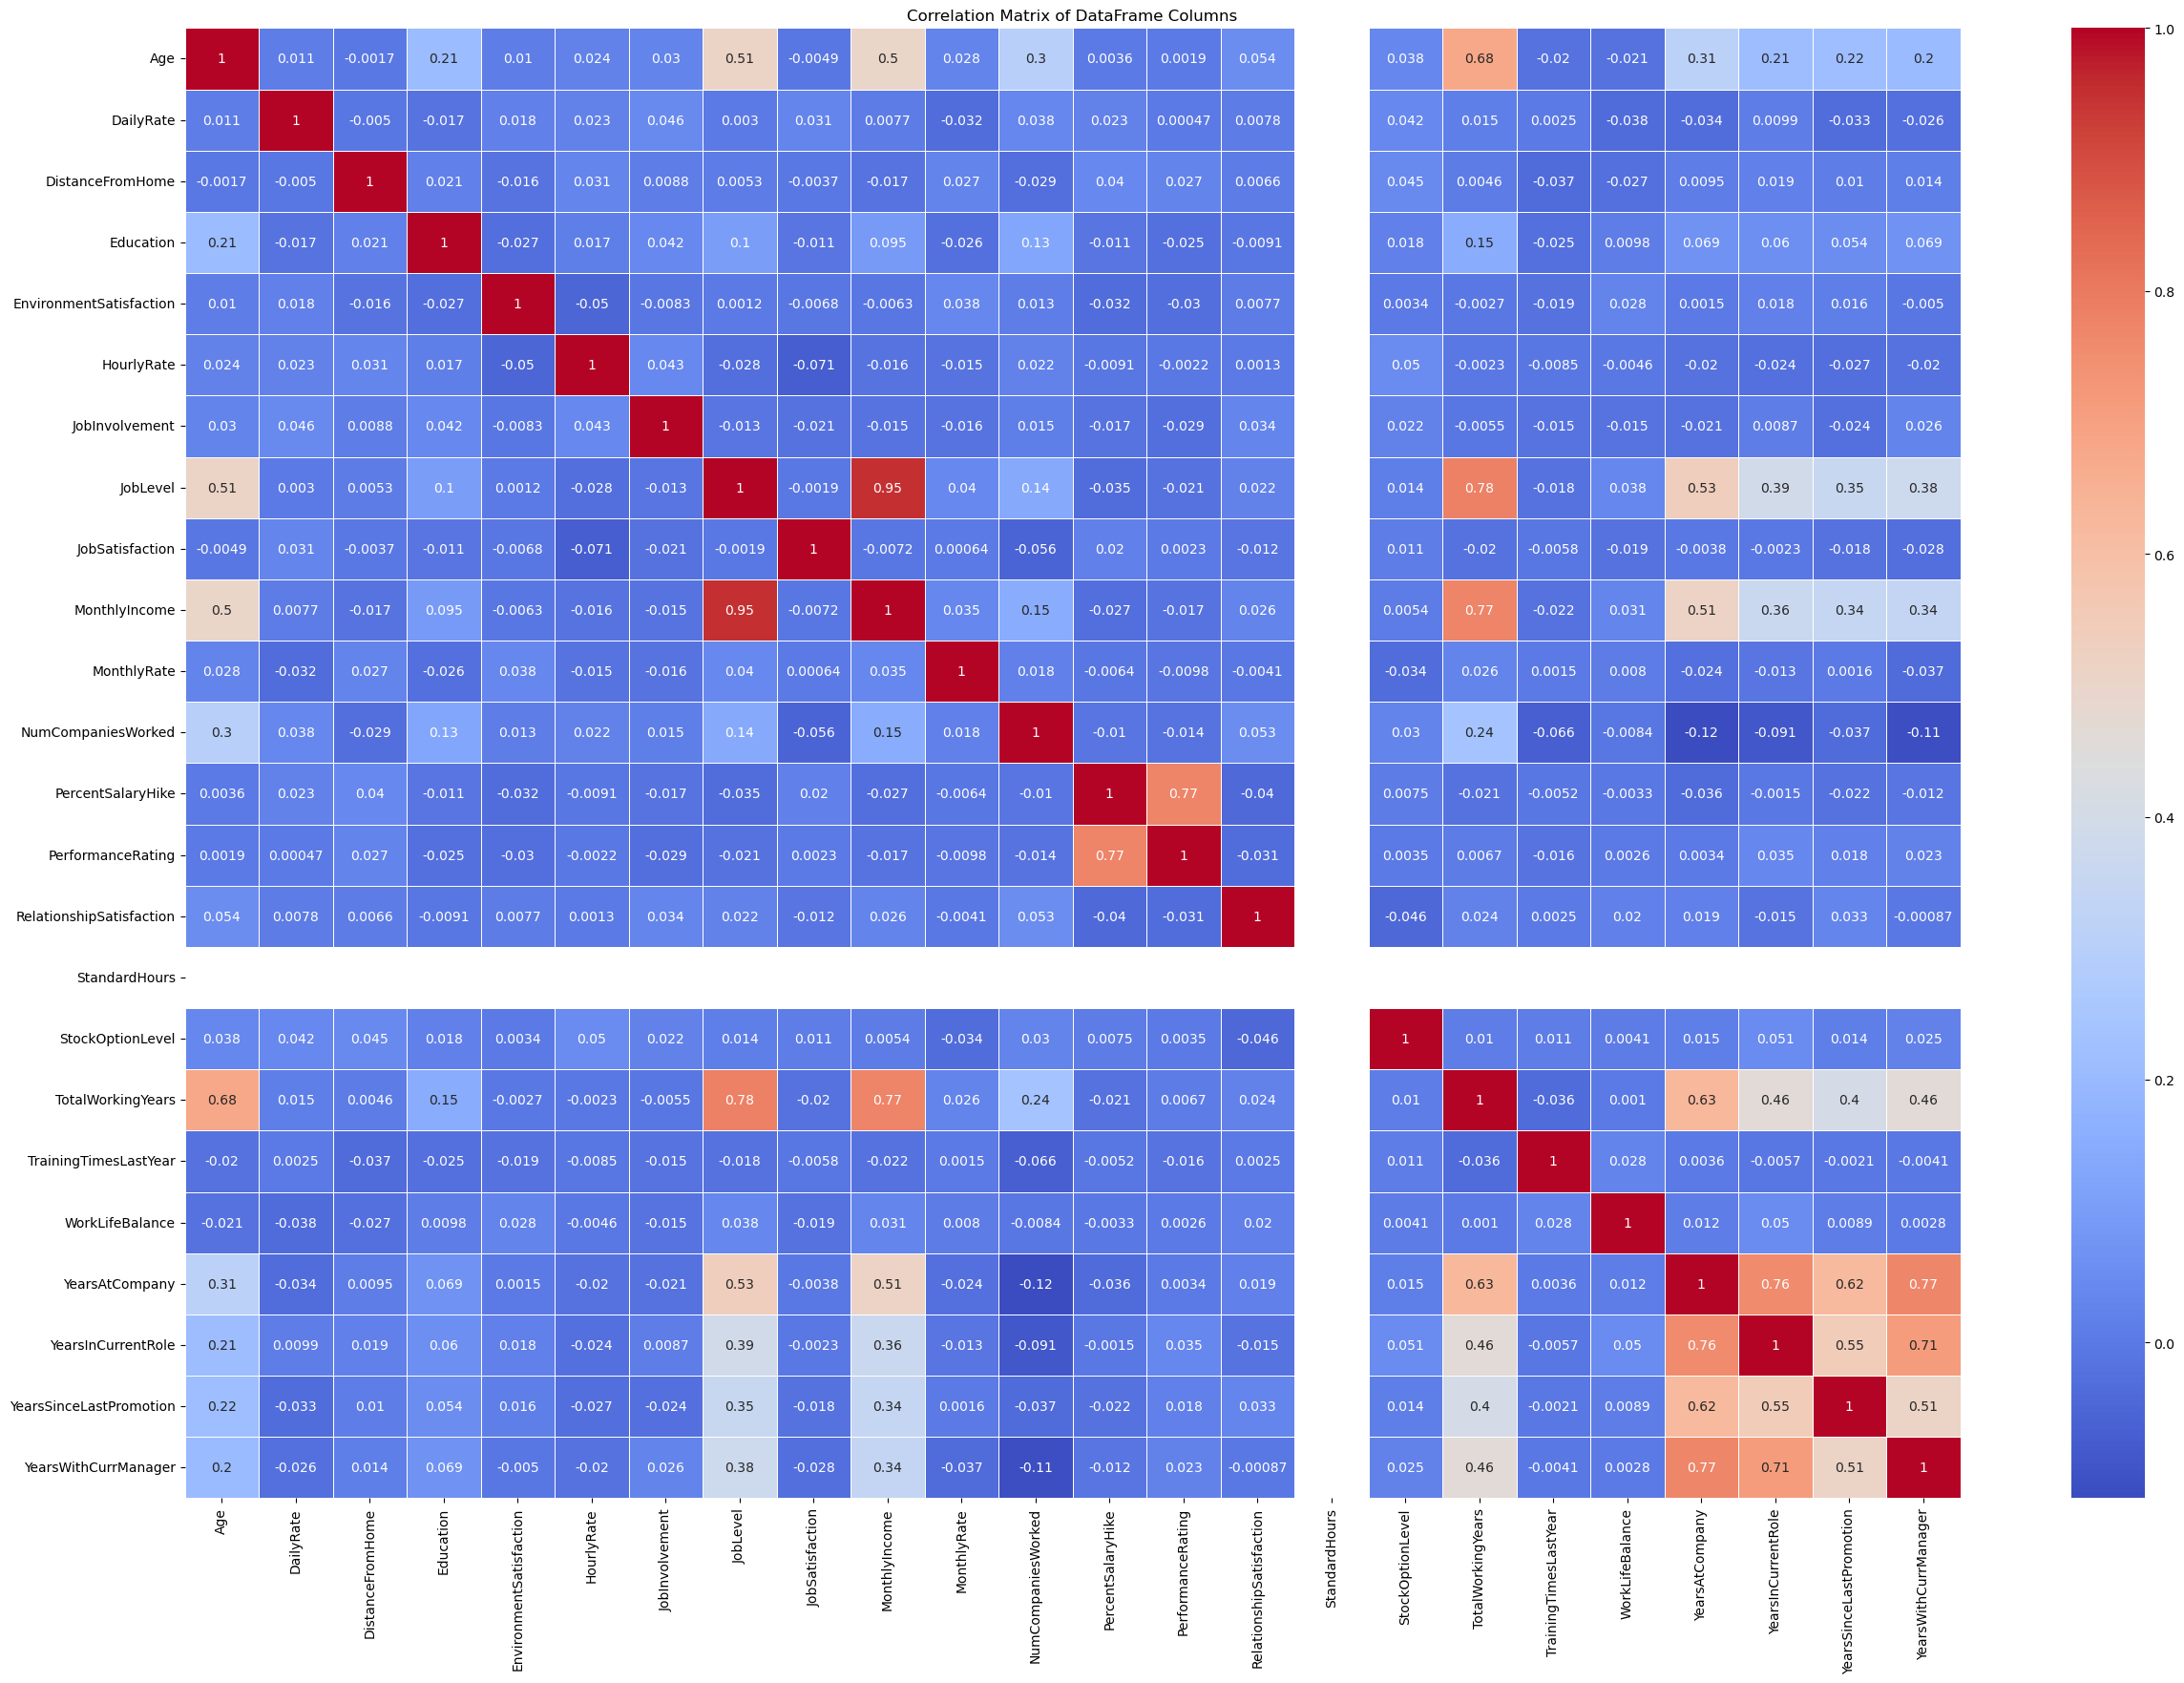

In [22]:
#Visualize corr matrix
plt.figure(figsize=(30, 20))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of DataFrame Columns')
plt.show()

In [23]:
from scipy.stats import pointbiserialr
numerical_col = list(set(df.columns) - set(categorical))
#print(numerical_col)
for col in numerical_col:
    corr, p_val = pointbiserialr(df['Attrition'], df[col])
    print(f"Point-Biserial Correlation between 'Attrition' and '{col}': {corr:.3f}, p-value: {p_val:.3f}")


Point-Biserial Correlation between 'Attrition' and 'YearsAtCompany': -0.134, p-value: 0.000
Point-Biserial Correlation between 'Attrition' and 'MonthlyIncome': -0.160, p-value: 0.000
Point-Biserial Correlation between 'Attrition' and 'PercentSalaryHike': -0.013, p-value: 0.606
Point-Biserial Correlation between 'Attrition' and 'RelationshipSatisfaction': -0.046, p-value: 0.079
Point-Biserial Correlation between 'Attrition' and 'DistanceFromHome': 0.078, p-value: 0.003
Point-Biserial Correlation between 'Attrition' and 'JobInvolvement': -0.130, p-value: 0.000
Point-Biserial Correlation between 'Attrition' and 'StockOptionLevel': -0.137, p-value: 0.000
Point-Biserial Correlation between 'Attrition' and 'HourlyRate': -0.007, p-value: 0.793
Point-Biserial Correlation between 'Attrition' and 'JobLevel': -0.169, p-value: 0.000
Point-Biserial Correlation between 'Attrition' and 'NumCompaniesWorked': 0.043, p-value: 0.096
Point-Biserial Correlation between 'Attrition' and 'EnvironmentSatisfact

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [24]:
#Split data into train and test data
X = df.drop(['Attrition','MonthlyIncome'], axis=1)  # remove the target variable and Monthly rate as it's highly correlated to Job level
y = df['Attrition'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
#1- Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display evaluation metrics
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.7448979591836735

Confusion Matrix:
 [[211  44]
 [ 31   8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       255
           1       0.15      0.21      0.18        39

    accuracy                           0.74       294
   macro avg       0.51      0.52      0.51       294
weighted avg       0.78      0.74      0.76       294



In [27]:
#Random Forest - Cross Validated
param_grid = {
    'n_estimators': [5, 10, 15, 20, 50, 100],
    'max_depth': [ None, 5, 6, 7, 9],
    #'max_features': ['sqrt', 'log2', None], 
    'max_leaf_nodes': [3, 6, 9]
}
clf = RandomForestClassifier(random_state=42)


grid_clf = GridSearchCV(clf, param_grid, cv=10)
grid_clf.fit(X_train, y_train)
print(grid_clf.best_estimator_)

RandomForestClassifier(max_depth=5, max_leaf_nodes=9, n_estimators=20,
                       random_state=42)


In [28]:
model_grid = RandomForestClassifier(max_depth=5, max_leaf_nodes=9, n_estimators=20, random_state=42) 

model_grid.fit(X_train, y_train) 
y_pred_grid = model_grid.predict(X_test) 
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_grid)
conf_matrix = confusion_matrix(y_test, y_pred_grid)
class_report = classification_report(y_test, y_pred_grid)

# Display evaluation metrics
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.8707482993197279

Confusion Matrix:
 [[255   0]
 [ 38   1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       1.00      0.03      0.05        39

    accuracy                           0.87       294
   macro avg       0.94      0.51      0.49       294
weighted avg       0.89      0.87      0.81       294



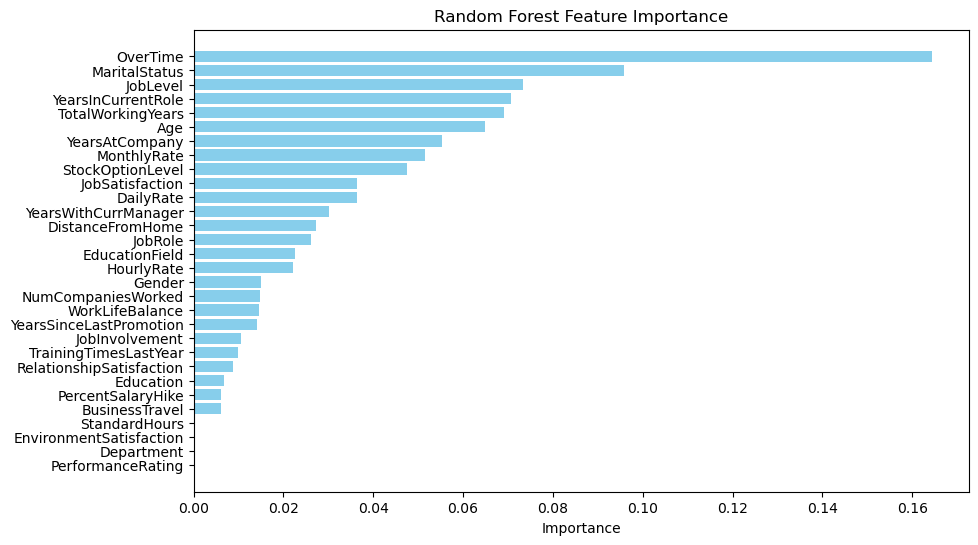

                     Feature  Importance
17                  OverTime    0.164344
14             MaritalStatus    0.095750
11                  JobLevel    0.073268
27        YearsInCurrentRole    0.070631
23         TotalWorkingYears    0.069165
0                        Age    0.064895
26            YearsAtCompany    0.055286
15               MonthlyRate    0.051535
22          StockOptionLevel    0.047503
13           JobSatisfaction    0.036477
2                  DailyRate    0.036368
29      YearsWithCurrManager    0.030197
4           DistanceFromHome    0.027350
12                   JobRole    0.026115
6             EducationField    0.022502
9                 HourlyRate    0.022023
8                     Gender    0.015070
16        NumCompaniesWorked    0.014814
25           WorkLifeBalance    0.014584
28   YearsSinceLastPromotion    0.014038
10            JobInvolvement    0.010637
24     TrainingTimesLastYear    0.009813
20  RelationshipSatisfaction    0.008721
5               

In [39]:
importances = model_grid.feature_importances_
feature_names = X.columns

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

print(feature_importance_df)

In [41]:
#3-KNN
X_np = X.to_numpy()
y_np = y.to_numpy()

In [45]:
#KNN
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(X_np, y_np, test_size=0.2, random_state=42)
for i in range(3,20): 
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    
    # Train the classifier on the training data
    knn_classifier.fit(X_train_np, y_train_np)
    y_pred_np = knn_classifier.predict(X_test_np)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test_np, y_pred_np)
    print (i, "    ", accuracy)

3      0.8027210884353742
4      0.8435374149659864
5      0.8231292517006803
6      0.8571428571428571
7      0.8537414965986394
8      0.8605442176870748
9      0.8605442176870748
10      0.8605442176870748
11      0.8537414965986394
12      0.8639455782312925
13      0.8571428571428571
14      0.8605442176870748
15      0.8605442176870748
16      0.8605442176870748
17      0.8605442176870748
18      0.8673469387755102
19      0.8673469387755102


In [47]:
#best N

knn_classifier = KNeighborsClassifier(n_neighbors=18)

# Train the classifier on the training data
knn_classifier.fit(X_train_np, y_train_np)
y_pred_np = knn_classifier.predict(X_test_np)

# Evaluate the model
accuracy = accuracy_score(y_test_np, y_pred_np)
conf_matrix = confusion_matrix(y_test_np, y_pred_np)
class_report = classification_report(y_test_np, y_pred_np)

# Display evaluation metrics
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.8673469387755102

Confusion Matrix:
 [[255   0]
 [ 39   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [50]:
#Gradient Boosing- Cross Validated
param_grid = {
    'n_estimators': [5, 10, 15, 20, 50, 100],
    'learning_rate': [ 0.001,0.01,0.05,0.08,0.1],
    
}
gb = GradientBoostingClassifier(random_state=42)


grid_clf = GridSearchCV(gb, param_grid, cv=10)
grid_clf.fit(X_train, y_train)
print(grid_clf.best_estimator_)

GradientBoostingClassifier(learning_rate=0.08, random_state=42)


In [51]:
gb_classifier = GradientBoostingClassifier( learning_rate=0.08, random_state=42)

# Train the classifier on the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.891156462585034

Confusion Matrix:
 [[250   5]
 [ 27  12]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       255
           1       0.71      0.31      0.43        39

    accuracy                           0.89       294
   macro avg       0.80      0.64      0.68       294
weighted avg       0.88      0.89      0.87       294



In [ ]:
#Gradient Boosting outperformed all the other models 